# IBM Employee Case Study

To Uncover the factors that lead to employee attrition in IBM, this is a fictional data set created by IBM data scientists.<br>
This data is about the employee on various factor influencing the attrition from the company.<br>
Exploring the Attrition of employees based on the various factor given.<br>

## Attribute Information
1. Age: ages of employees
2. Department: different department in IBM
3. DistanceFromHome: distance of office from home
4. Education: 5 values- 'Below College', 'College', 'Bachelor', 'Master','Doctor' as 1,2,3,4,5 respectively
5. EmployeeNumber: No. of employee in a department
6. EnvironmentSatisfaction: 4 values- 'Low', 'Medium', 'High', 'Very High' as 1,2,3,4 respectively
7. Gender: Male or Female	
8. HourlyRate: hourly pay of an employee	
9. JobInvolvement: 4 values- 'Low', 'Medium', 'High', 'Very High' as 1,2,3,4 respectively	
10. JobRole: job role of employee	
11. JobSatisfaction: 4 values- 'Low', 'Medium', 'High', 'Very High' as 1,2,3,4 respectively
12. MaritalStatus: Single, Married, Divorced	
13. MonthlyIncome: Salary	
14. NumCompaniesWorked: no. of past companies	
15. OverTime: Yes or No	
16. PercentSalaryHike: Salary Hike Percentage	
17. PerformanceRating: 4 values- 'Low', 'Good', 'Excellent', 'Outstanding' as 1,2,3,4 respectively
18. YearsAtCompany: Current no. of working year in IBM	
19. Attrition: 2 values- 0 & 1

## Objective :
The goal of this Data Analysis is to reduce Attrition rate by suggestions,conclusions, Insights using- 
1. Python (NumPy, Pandas, Matplotlib, Seaborn)
2. SQL

In [1]:
# importing libraries
import mysql.connector as c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Database Connection

In [2]:
conn = c.connect(host='localhost', database= 'mydb',user='root',password= 'sql1919' )
cursor = conn.cursor()
if conn.is_connected():
    print('connected to database')

connected to database


# Data Exploration

In [3]:
#getting names of columns
emp_column= pd.read_sql('SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME=\'emp\'',conn)
emp_column

,COLUMN_NAME
0,Age
1,Department
2,DistanceFromHome
3,Education
4,EmployeeNumber
5,EnvironmentSatisfaction
6,Gender
7,HourlyRate
8,JobInvolvement
9,JobRole


In [4]:
#examining the data
emp_data = pd.read_sql('SELECT * FROM EMP',conn)
emp_data.head()

,Age,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,Attrition
0,41,Sales,1,2,1,2,Female,94,3,Sales Executive,4,Single,5993,8,Yes,11,3,6,1
1,49,Research & Development,8,1,2,3,Male,61,2,Research Scientist,2,Married,5130,1,No,23,4,10,0
2,37,Research & Development,2,2,4,4,Male,92,2,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,1
3,33,Research & Development,3,4,5,4,Female,56,3,Research Scientist,3,Married,2909,1,Yes,11,3,8,0
4,27,Research & Development,2,1,7,1,Male,40,3,Laboratory Technician,2,Married,3468,9,No,12,3,2,0


In [5]:
# summary of dataset
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1058 non-null   int64 
 1   Department               1058 non-null   object
 2   DistanceFromHome         1058 non-null   int64 
 3   Education                1058 non-null   int64 
 4   EmployeeNumber           1058 non-null   int64 
 5   EnvironmentSatisfaction  1058 non-null   int64 
 6   Gender                   1058 non-null   object
 7   HourlyRate               1058 non-null   int64 
 8   JobInvolvement           1058 non-null   int64 
 9   JobRole                  1058 non-null   object
 10  JobSatisfaction          1058 non-null   int64 
 11  MaritalStatus            1058 non-null   object
 12  MonthlyIncome            1058 non-null   int64 
 13  NumCompaniesWorked       1058 non-null   int64 
 14  OverTime                 1058 non-null  

### Insight-
1. Dataset contain 1058 rows & 19 columns <br>
2. There are 14 numerical column & 5 categorical column <br>
3. There are no missing values<br>
4. All required column are in correct datatype.<br>

In [6]:
#descriptive summary of data-
emp_data.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,Attrition
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,37.055766,8.978261,2.879017,731.753308,2.712665,65.643667,2.73724,2.749527,6625.945180,2.706994,15.155955,3.150284,7.065217,0.169187
std,9.410421,8.040608,1.031442,431.418209,1.092959,20.324861,0.70473,1.104144,4837.695042,2.523526,3.641097,0.357518,6.265227,0.375094
min,18.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.00000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,364.500000,2.000000,48.000000,2.00000,2.000000,2900.250000,1.000000,12.000000,3.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,723.500000,3.000000,65.000000,3.00000,3.000000,4903.500000,2.000000,14.000000,3.000000,5.000000,0.000000
75%,43.000000,13.000000,4.000000,1101.750000,4.000000,83.000000,3.00000,4.000000,8736.500000,4.000000,18.000000,3.000000,9.000000,0.000000
max,60.000000,29.000000,5.000000,1487.000000,4.000000,100.000000,4.00000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000,1.000000


# Exploratory Data Analysis

### > Top 10 Age group in which employee attrition most?

In [7]:
no_of_emp = pd.read_sql("""SELECT Age, COUNT(Age) AS attrition_amount FROM emp 
                        WHERE Attrition=1 GROUP BY Age ORDER BY attrition_amount DESC LIMIT 10""",conn)
no_of_emp['Age']=no_of_emp['Age'].astype(str)
no_of_emp

,Age,attrition_amount
0,31,14
1,29,12
2,33,11
3,26,11
4,28,10
5,32,7
6,41,6
7,34,6
8,39,6
9,20,6


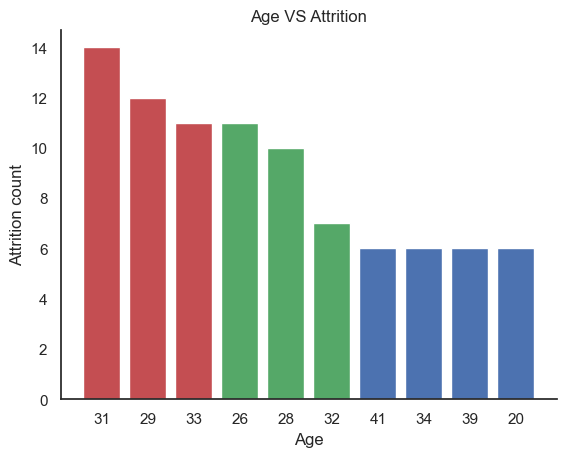

In [8]:
sns.set_style('white')
plt.title('Age VS Attrition')
plt.bar(x=no_of_emp['Age'],height= no_of_emp['attrition_amount'],color= list('rrrgggbbbb'))
plt.xlabel('Age')
plt.ylabel('Attrition count')
sns.despine()
plt.show()

#### Insight-
People of 25 to 31 Age group are attrited or shifted mostly

### > Who Attrited most on basis of Gender?

In [9]:
attrition_gender = pd.read_sql("""SELECT Gender, COUNT(gender) as attrited_count FROM emp 
                                WHERE Attrition=1 GROUP BY Gender ORDER BY attrited_count DESC""",conn)
attrition_gender

,Gender,attrited_count
0,Male,108
1,Female,71


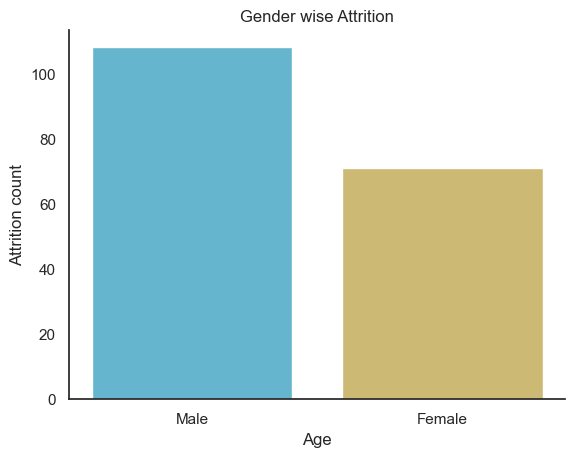

In [10]:
sns.set_style('white')
plt.title('Gender wise Attrition')
plt.bar(x=attrition_gender['Gender'],height=attrition_gender['attrited_count'],color=list('cy'))
plt.xlabel('Age')
plt.ylabel('Attrition count')
sns.despine()
plt.show()

### Insight-
1. Male employees are more attrited or shifted as compare to Female employees.<br>
2. However amount of Female employees can't be neglected they are also more.<br>

### > Which Job Role's Employee attrited the most?

In [11]:
job_at= pd.read_sql('''SELECT JobRole, COUNT(*) as attrited_count FROM emp 
                    WHERE Attrition=1 GROUP BY JobRole ORDER BY attrited_count DESC''',conn)
job_at

,JobRole,attrited_count
0,Laboratory Technician,49
1,Sales Executive,39
2,Research Scientist,38
3,Sales Representative,25
4,Healthcare Representative,8
5,Manufacturing Director,7
6,Human Resources,6
7,Manager,5
8,Research Director,2


In [12]:
#calculating percentage for pie chart
total=0
for i in range(len(job_at['attrited_count'])):
    total+= job_at['attrited_count'][i]
percentage = job_at['attrited_count'].apply(lambda x:(x/total)*100)
percentage

0    27.374302
1    21.787709
2    21.229050
3    13.966480
4     4.469274
5     3.910615
6     3.351955
7     2.793296
8     1.117318
Name: attrited_count, dtype: float64

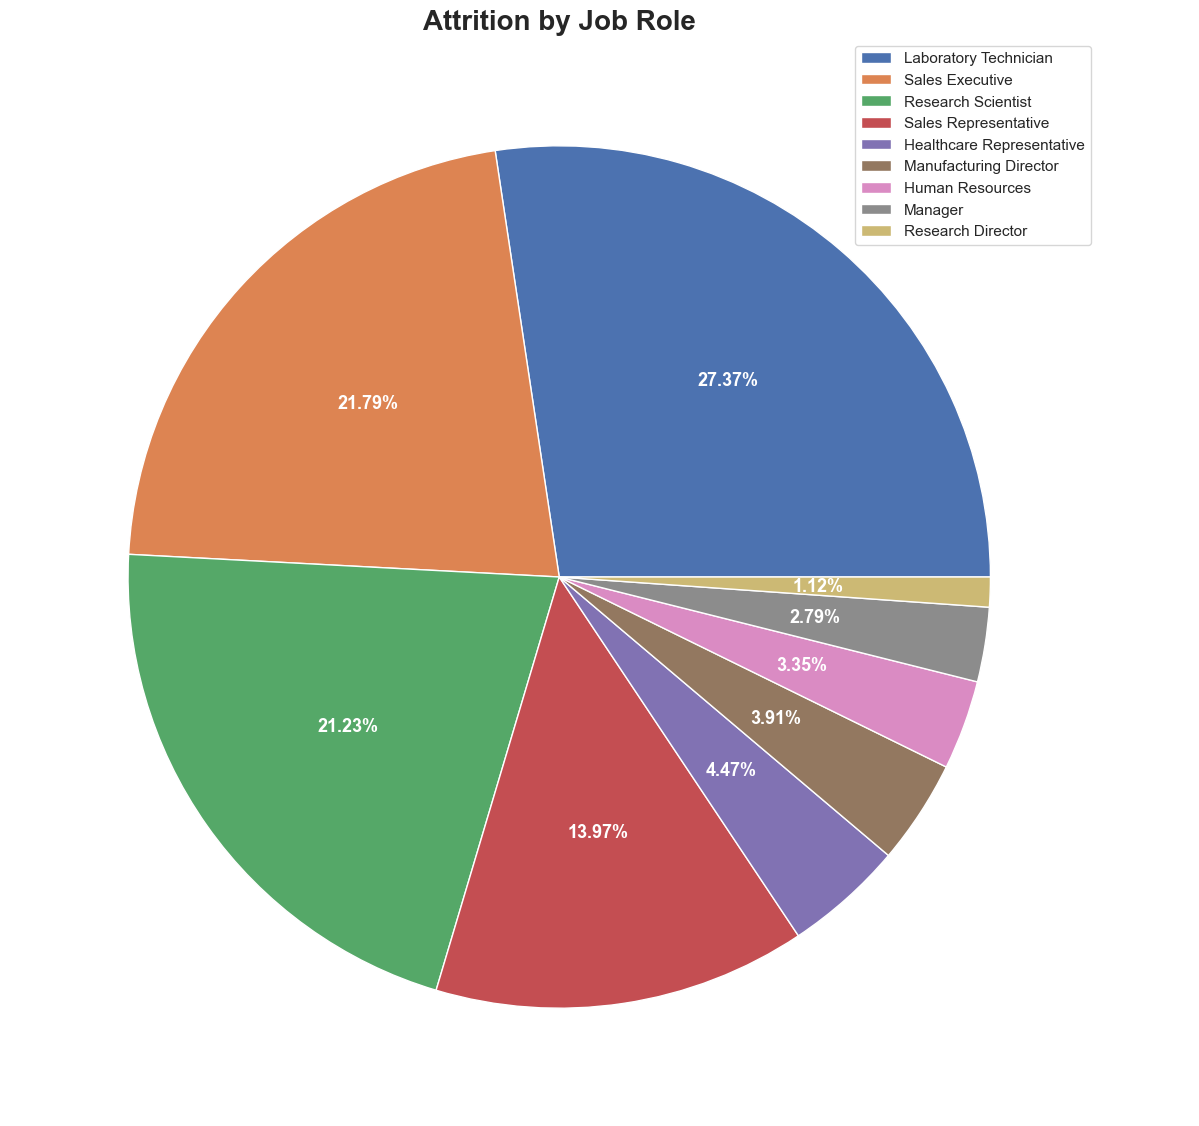

In [13]:
plt.figure(figsize=(14,14))
plt.title('Attrition by Job Role',fontsize=20,weight='bold')
plt.pie(percentage,
       labels= job_at['JobRole'].values,
       autopct='%.2f%%',
       textprops = {'size':'13','fontweight':'bold','color':'w'}
       )
plt.legend(loc='upper right')
plt.show()

#### Insight-
Above Figure shows that-
1. Attrition caused mostly in Laboratory Technician, Sales Executive, Research Scientist Job roles.<br>
2. These 3 covers more than 60% of pie chart which is a sensetive topic.<br>
3. Sales Representative also covers 13%  of chart, it should also be concerned.<br>

### > Analysing Monthly Income on basis of Job Role-

In [14]:
#calculating for attrition=0; means employee which do not left
monthly_0 = pd.read_sql('''SELECT JobRole,AVG(MonthlyIncome) as avg_salary FROM emp where Attrition=0
                        GROUP BY JobRole
                        ORDER BY avg_salary''',conn)
monthly_0

,JobRole,avg_salary
0,Sales Representative,2705.0606
1,Research Scientist,3236.6648
2,Laboratory Technician,3331.3885
3,Human Resources,4443.6250
4,Sales Executive,6848.5026
5,Manufacturing Director,7414.4800
6,Healthcare Representative,7696.6000
7,Research Director,16006.4500
8,Manager,17162.7027


In [15]:
#calculating for attrition=1; means employee which left
monthly_1 = pd.read_sql('''SELECT JobRole,AVG(MonthlyIncome) as avg_salary FROM emp where Attrition=1
                        GROUP BY JobRole
                        ORDER BY avg_salary''',conn)
monthly_1

,JobRole,avg_salary
0,Sales Representative,2485.4400
1,Research Scientist,2763.6842
2,Laboratory Technician,2983.1837
3,Human Resources,5092.0000
4,Sales Executive,7260.7179
5,Manufacturing Director,7774.0000
6,Healthcare Representative,8501.0000
7,Manager,16797.4000
8,Research Director,19395.5000


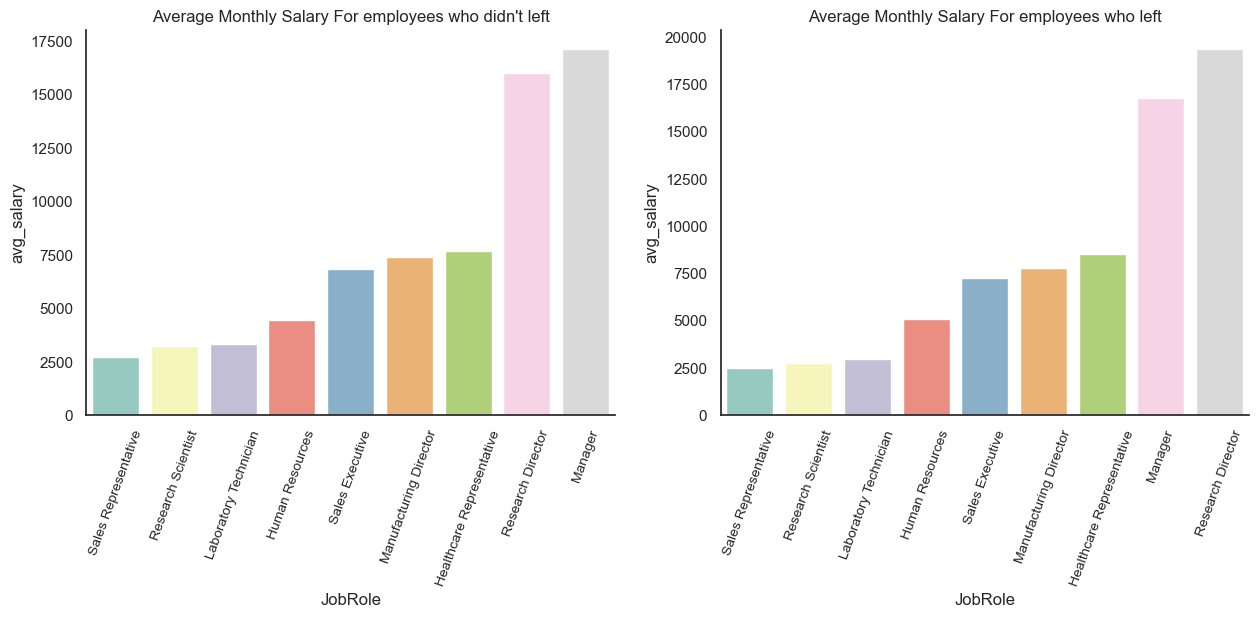

In [16]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
plt.title('Average Monthly Salary For employees who didn\'t left')
sns.barplot(x=monthly_0['JobRole'],y= monthly_0['avg_salary'],palette='Set3')
plt.xticks(rotation=70,fontsize=10)
plt.subplot(122)
plt.title('Average Monthly Salary For employees who left')
sns.barplot(x=monthly_1['JobRole'],y= monthly_1['avg_salary'],palette='Set3')
plt.xticks(rotation=70,fontsize=10)
sns.despine()

#### Insight-
On comparing both Figure, we conclude that-
1. Sales Representatives which do not left the company has more salary i.e. 2751 as compare to<br>
   employees who left has salary 2485.<br>
2. Research Scientist which do not left the company has more salary i.e. 3236 as compare to<br>
   employees who left has salary 2763.<br>
3. Laboratory Technician which do not left the company has more salary i.e. 3331 as compare to<br>
   employees who left has salary 2983.<br>
   And so on for other Job roles.

### > Attrition Amount On basis of Marital Status-

In [17]:
marital_att = pd.read_sql('''SELECT MaritalStatus,count(*) as attrited_amount FROM emp where Attrition=1
                            GROUP BY MaritalStatus
                            ORDER BY attrited_amount DESC''',conn)
marital_att

,MaritalStatus,attrited_amount
0,Single,94
1,Married,62
2,Divorced,23


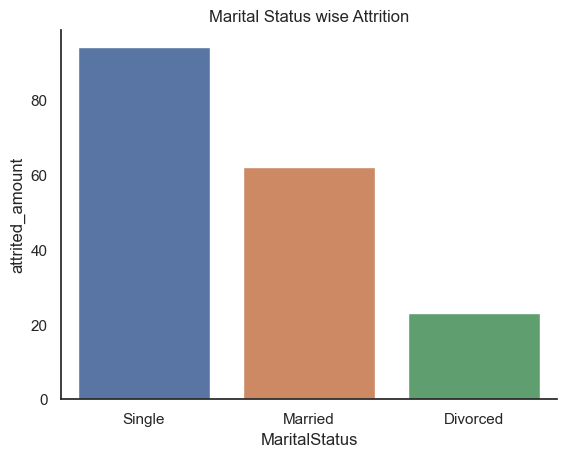

In [18]:
plt.title('Marital Status wise Attrition')
sns.barplot( x=marital_att['MaritalStatus'],y=marital_att['attrited_amount'])
sns.despine()

#### Insight-
Above Fifure shows that-
1. Employees with marital status as Single Attrited the most.<br>
2. Then Employees with marital status as Married Attrited the Second most.<br>

### > Attrition on basis of Environment Satisfaction-

In [19]:
env_att = pd.read_sql('''SELECT EnvironmentSatisfaction,count(*) as attrited_amount FROM emp where Attrition=1
                        GROUP BY EnvironmentSatisfaction
                        ORDER BY EnvironmentSatisfaction''',conn)
env_att

,EnvironmentSatisfaction,attrited_amount
0,1,57
1,2,35
2,3,47
3,4,40


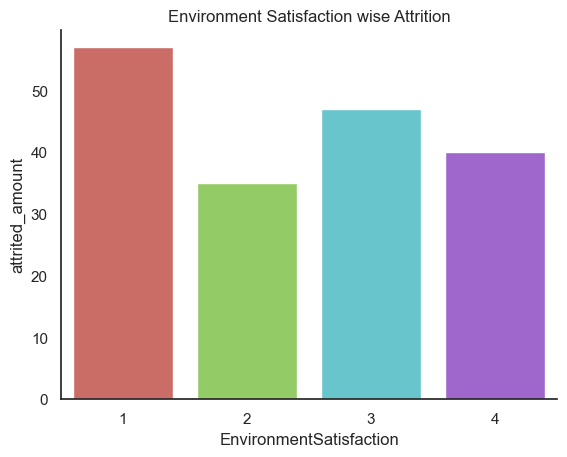

In [20]:
plt.title('Environment Satisfaction wise Attrition')
sns.barplot( x=env_att['EnvironmentSatisfaction'],y=env_att['attrited_amount'],palette='hls')
sns.despine()

####  Insight-
Above Figure shows that-
1. Employees who have Low Environment Satisfaction i.e. 1, are attrited most.<br>
2. Employees who have high Environment Satisfaction i.e. 3, are attrited second most.<br>
3. Employees who have very high Environment Satisfaction i.e. 4, are attrited third most.<br>

### > Attrition on basis of Salary Percent Hike-

In [21]:
salary_att= pd.read_sql('''SELECT PercentSalaryHike,count(*) as attrited_amount FROM emp where Attrition=1
                            GROUP BY PercentSalaryHike
                            ORDER BY attrited_amount DESC''',conn)
salary_att

,PercentSalaryHike,attrited_amount
0,11,28
1,13,26
2,12,24
3,14,19
4,15,15
5,18,12
6,22,11
7,16,11
8,17,8
9,19,8


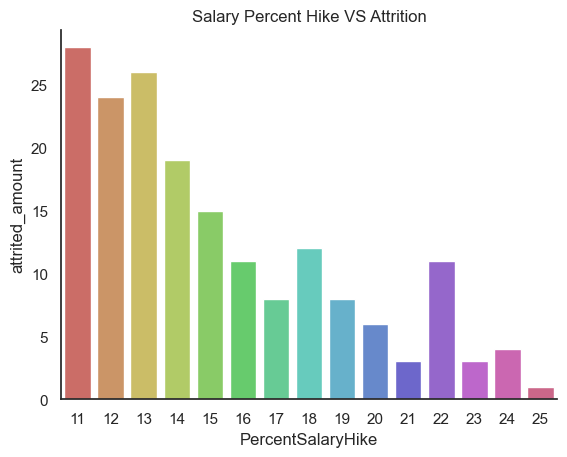

In [22]:
plt.title('Salary Percent Hike VS Attrition')
sns.barplot( x=salary_att['PercentSalaryHike'],y=salary_att['attrited_amount'],palette='hls')
sns.despine()

#### Insight-
Above figure shows that-
1. Employees with low salary hike are attrited mostly.<br>
2. Distribution of data is right skewed.<br>
3. As Salary Percent Hike increases, Attrition Decreases.<br>

### > Attrition on basis of  Year of Working IN IBM-

In [23]:
year_att = pd.read_sql("""select YearsAtCompany,COUNT(YearsAtCompany) AS attrited_amount from emp 
                        where Attrition=1 GROUP BY YearsAtCompany order by attrited_amount desc""",conn)
                       
year_att

,YearsAtCompany,attrited_amount
0,1,44
1,2,19
2,3,18
3,5,15
4,4,14
5,10,13
6,0,11
7,7,9
8,6,8
9,8,8


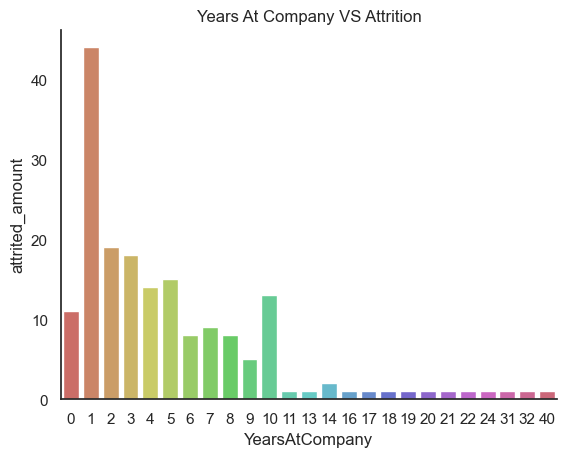

In [24]:
plt.title('Years At Company VS Attrition')
sns.barplot( x=year_att['YearsAtCompany'],y = year_att['attrited_amount'],palette='hls')
sns.despine()

#### Insight-
1. Years at Company is right distributed.<br>
2. Maximum Attrition occur with employees who have 1 year of experience in IBM.<br>
3. Attrition decreases as number of years of experience in IBM increases.<br>
3. However most of the attrition is between 0 to 5 years but after that attrition decreases.<br>

<Axes: >

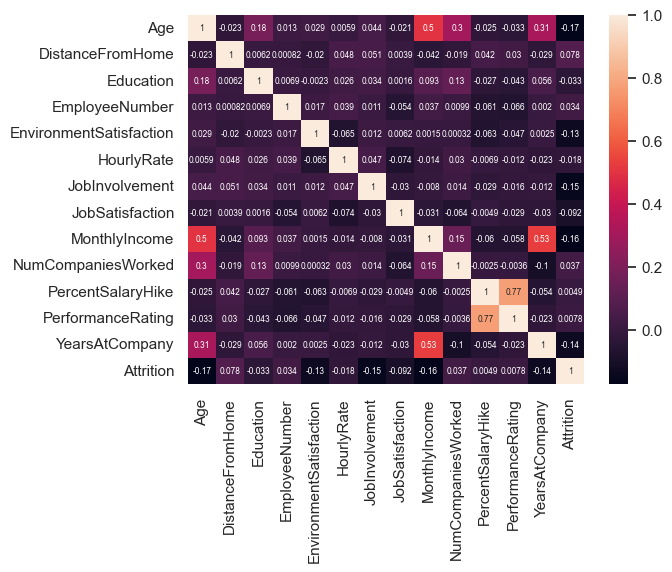

In [25]:
#correlation between columns
sns.heatmap(emp_data.corr(),annot=True,annot_kws={'fontsize': 6})

### > Overall Attrition Percentage-

In [26]:
#calculating percentage for pie chart
percentage =emp_data['Attrition'].value_counts(normalize=True)*100
percentage

0    83.081285
1    16.918715
Name: Attrition, dtype: float64

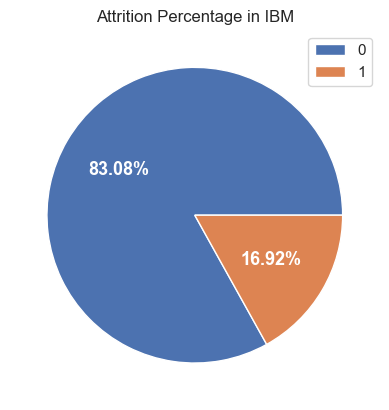

In [27]:
plt.title('Attrition Percentage in IBM')
plt.pie(percentage,
       labels= [0,1],
       autopct='%.2f%%',
       textprops = {'size':'13','fontweight':'bold','color':'w'})
plt.legend()
plt.show()

#### Insight-
16.92% of total employees in IBM attrited.

# Conclusion:
1. In IBM, most of the employee of age group 25 to 31 attrited/left/shifted including both male & female.<br>
2. Cause of Attrition is due to difference between monthly salary of employees at same post and same job role,<br>
3. Environment Satisfaction is also not suited for employees because most of the attrited employees has low satisfaction.<br>
4. Due to less Salary percent hike most of the employee attrited and also it is observed in above analysis that employee<br>
   with High satisfaction leaves the company.<br>
5. Maximum attrition occur with employee working from 0 to 5 years, but as Experience increases attrition decreases.<br>
IBM should improve its working environment and also maintain clear and fair salary of employees. It is seen above employee with good salary, high satisfaction and more salary hike stays and perform well.
